### Discussion Related With Outliers And Impact On Machine Learning!!

##### Which Machine LEarning Models Are Sensitive To Outliers?
1. Naivye Bayes Classifier--- Not Sensitive To Outliers
2. SVM--------                Not Sensitive To Outliers          
3. Linear Regression----------  Sensitive To Outliers
4. Logistic Regression-------   Sensitive To Outliers
5. Decision Tree Regressor or Classifier---- Not Sensitive
6. Ensemble(RF,XGboost,GB)------- Not Sensitive
7. KNN--------------------------- Not Sensitive 
8. Kmeans------------------------ Sensitive
9. Hierarichal------------------- Sensitive 
10. PCA-------------------------- Sensitive 
11. Neural Networks-------------- Sensitive


In [731]:
import pandas as pd

In [732]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [733]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [734]:
import pandas as pd
df=pd.read_csv('titanic.csv')
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

XU LI THEM MEDIAN

In [735]:

median=df['Age'].median() # ! 28.0
df['Age_median']=df['Age'].fillna(median)



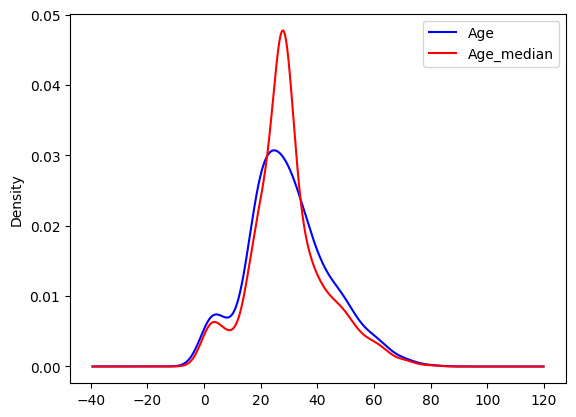

In [736]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', color='blue')
df['Age_median'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

THAY THE BANG MEAN

In [737]:
mean=df['Age'].mean() # ! 28.0
df['Age_mean']=df['Age'].fillna(mean)

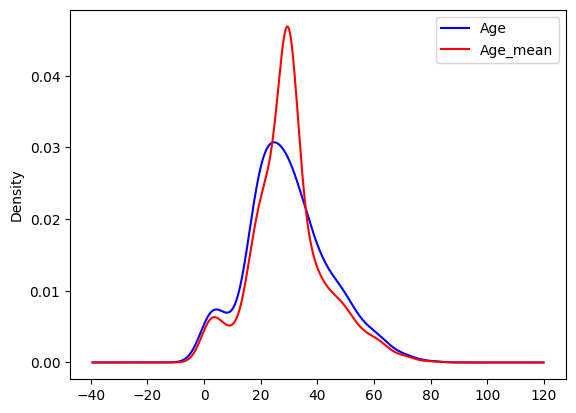

In [738]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', color='blue')
df['Age_mean'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

THAY THE BANG MODE

In [739]:
mode=df['Age'].mode() # ! 28.0
df['Age_mode']=df['Age'].fillna(float(mode.values))

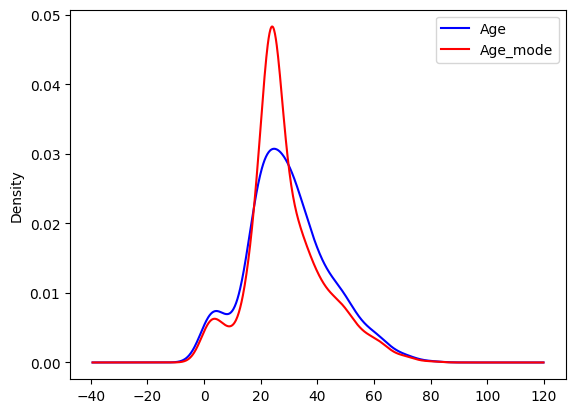

In [740]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', color='blue')
df['Age_mode'].plot(kind='kde', color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



THAY THE GIA TRI NGAU NHIEN

In [741]:
df['Age'].dropna().sample()

743    24.0
Name: Age, dtype: float64

In [742]:

random_samples = df['Age'].dropna().sample(n=df['Age'].isnull()
.sum(),random_state=0)
random_samples


423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [743]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [744]:
random_samples.index = df[df['Age'].isnull()].index

In [745]:
df['Age_random']=df['Age']
df.loc[df['Age'].isnull(), 'Age_random']=random_samples
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_median,Age_mean,Age_mode,Age_random
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,27.0,27.000000,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,19.0,19.000000,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,28.0,29.699118,24.0,15.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,26.0,26.000000,26.0,26.0
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,32.0,32.000000,32.0,32.0


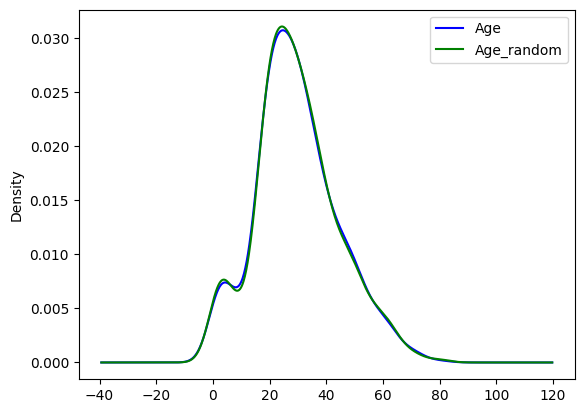

In [746]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='blue')
df['Age_random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')



In [747]:
# sns.distplot(df['Age'].dropna())

In [748]:
# sns.distplot(df['Age'].fillna(100))

THEM DU LIEU O DUOI

In [749]:
# gia tri o duoi cua phan bo (bien Age theo phan bo chuan)
extreme = df.Age.mean() + 3*df.Age.std()
extreme


73.27860964406094

In [750]:
# định nghia hàm thay thế dữ liệu theo 2 cách:  End of Distribution
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_dist"]=df[variable].fillna(extreme)

In [751]:
# gọi hàm thay thế dữ liệu
impute_nan(df,'Age',df.Age.median(),extreme)

<Axes: >

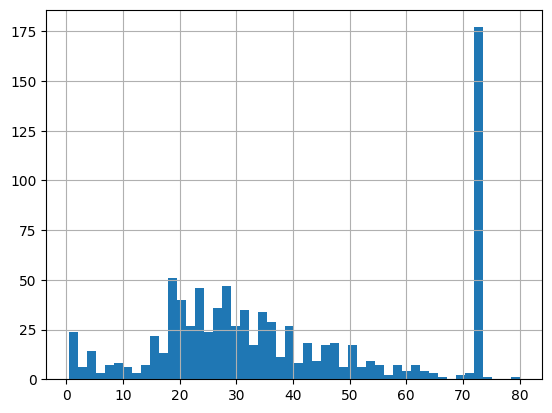

In [752]:
df['Age_end_dist'].hist(bins=50)

In [753]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

In [754]:
impute_nan(df,'Age')

<Axes: >

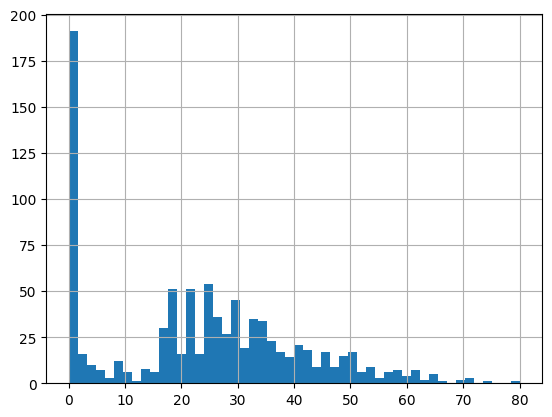

In [755]:

df['Age_zero'].hist(bins=50)


<Axes: >

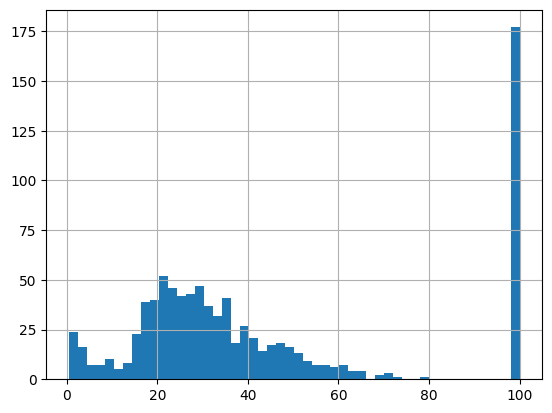

In [756]:
df['Age_hundred'].hist(bins=50)

<!-- #### Gaussian Distributed -->

In [757]:
# figure=df.Age.hist(bins=50)
# figure.set_title('Age')
# figure.set_xlabel('Age')
# figure.set_ylabel('No of passenger')

In [758]:
# figure=df.boxplot(column="Age")

In [759]:
# df['Age'].describe()

THEM GIA TRI NGAU NHIEN

In [760]:
import numpy as np
mode=df['Age'].mode() # ! 28.0
df['Age_random2']=df['Age'].fillna(float(np.random.randint(100)))

In [761]:
df['Age_random2'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age_random2
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


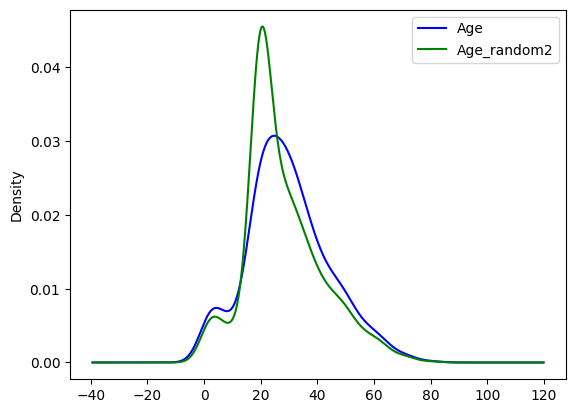

In [762]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='blue')
df['Age_random2'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

NEW FEATURE

In [763]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [764]:
df['Age_Newf']=df['Age']
df['Age_Newf'].fillna(df.Age.median(),inplace=True)

In [765]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


#### OUTLIERS  ( GAUSSIAN)

In [766]:

def gaussian(lst):
    
    uppper_boundary=lst.mean() + 3* lst.std()
    lower_boundary=lst.mean() - 3* lst.std()
    print(lower_boundary), print(uppper_boundary),print(lst.mean())
    lst.loc[lst>=uppper_boundary]=uppper_boundary
    return lst

#### OUTLIERS  (SKEWED)

Text(0, 0.5, 'No of passenger')

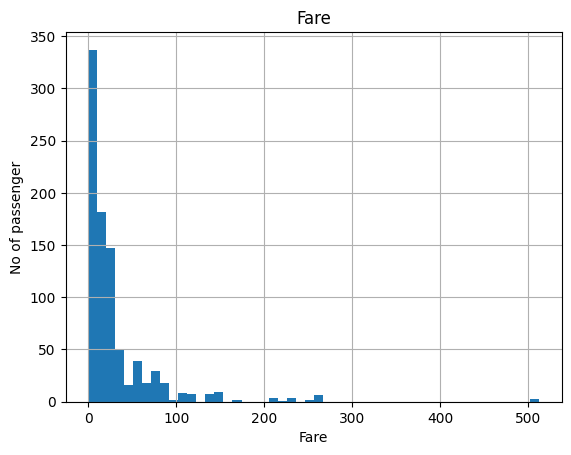

In [767]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

<Axes: >

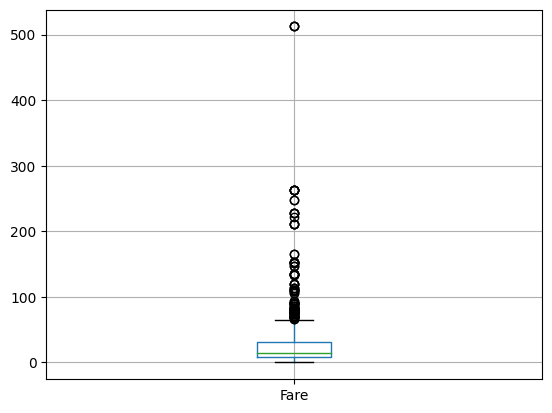

In [768]:
df.boxplot(column="Fare")

In [769]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [770]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [771]:
#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [772]:
data=df.copy()
datas=df.copy()
datag=df.copy()

Xu li datas none - skewed

In [773]:
datas.loc[datas['Fare']>=100,'Fare']=100

Xu li datag gauss

In [774]:
datag['Age_mean']=gaussian(datag['Age_mean'])
datag['Age_mode']=gaussian(datag['Age_mode'])
datag['Age_median']=gaussian(datag['Age_median'])
datag['Age_random']=gaussian(datag['Age_random'])
datag['Age_random2']=gaussian(datag['Age_random2'])
datag['Age_end_dist']=gaussian(datag['Age_end_dist'])
datag['Age_Newf']=gaussian(datag['Age_Newf'])
# datag['Age_NAN']=gaussian(datag['Age_NAN'])







-9.306928030949827
68.70516332506747
29.69911764705882
-11.031745606269713
68.16568500020911
28.566969696969696
-9.697507161337114
68.42067214450209
29.36158249158249
-13.990614345024813
73.39131019238734
29.70034792368126
-12.926565520152298
68.4712793248661
27.7723569023569
-26.801128903464424
103.51377515935394
38.356323127944755
-9.697507161337114
68.42067214450209
29.36158249158249


C:\Users\ACER\AppData\Local\Temp\ipykernel_27184\2215347619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lst.loc[lst>=uppper_boundary]=uppper_boundary


Text(0, 0.5, 'No of passenger')

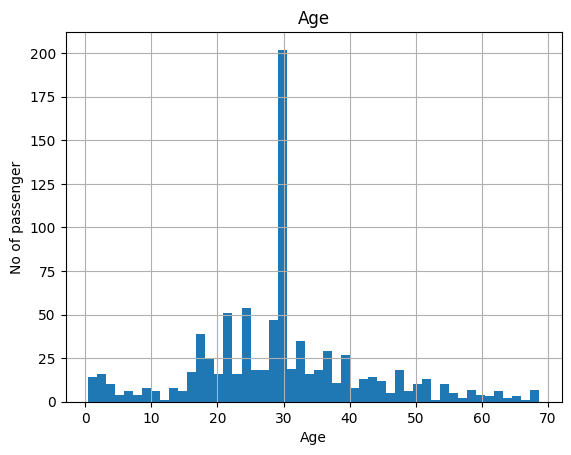

In [775]:
figure=datag.Age_mean.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

In [776]:
data.loc[data['Fare']>=100,'Fare']=100

In [777]:
data.loc[data['Age']>=73,'Age']=73
data['Age_mean']=gaussian(data['Age_mean'])
data['Age_mode']=gaussian(data['Age_mode'])
data['Age_median']=gaussian(data['Age_median'])
data['Age_random']=gaussian(data['Age_random'])
data['Age_random2']=gaussian(data['Age_random2'])
data['Age_end_dist']=gaussian(data['Age_end_dist'])
datag['Age_Newf']=gaussian(datag['Age_Newf'])
# data['Age_NAN']=gaussian(data['Age_NAN'])


-9.306928030949827
68.70516332506747
29.69911764705882
-11.031745606269713
68.16568500020911
28.566969696969696
-9.697507161337114
68.42067214450209
29.36158249158249
-13.990614345024813
73.39131019238734
29.70034792368126
-12.926565520152298
68.4712793248661
27.7723569023569
-26.801128903464424
103.51377515935394
38.356323127944755
-9.42417480193527
68.08548727109692
29.330656234580825


C:\Users\ACER\AppData\Local\Temp\ipykernel_27184\2215347619.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lst.loc[lst>=uppper_boundary]=uppper_boundary


Text(0, 0.5, 'No of passenger')

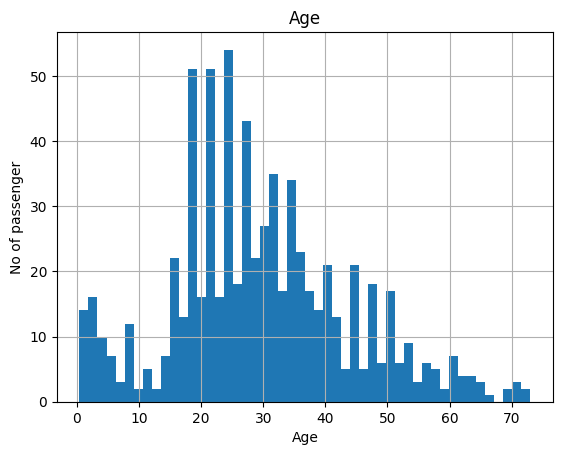

In [778]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

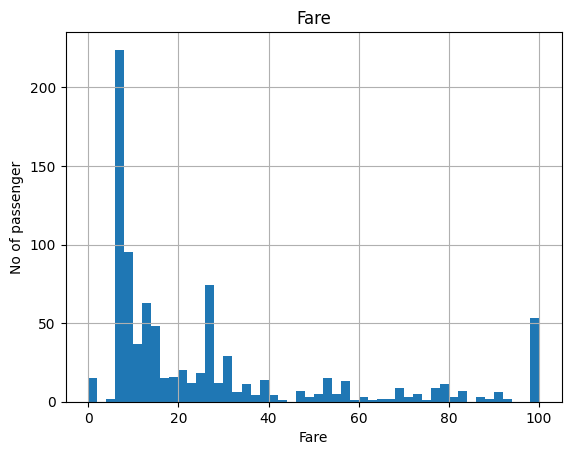

In [779]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

AGE

In [780]:
IQR=df.Age.quantile(0.75)-df.Age.quantile(0.25)
lower_bridge=df['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df['Age'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-33.5
91.625


(None, None)

In [781]:
data1=df.copy()

In [782]:
data1.loc[data['Age']>=91,'Age']=91
print(data['Age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [783]:
data1.loc[data['Fare']>=100,'Fare']=100

Train AGE FARE

In [784]:
AGEFARE_FIX=[]
AGEFARE_NOTFIX=[]

In [785]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    AGEFARE_FIX.append(accuracy_score(y_test,y_pred))


Accuracy_score: 0.7052238805970149
Accuracy_score: 0.6455223880597015
Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.7052238805970149
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.6529850746268657


In [786]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    AGEFARE_NOTFIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.6492537313432836


In [787]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datag[['Age_mean','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    AGEFARE_NOTFIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6417910447761194
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6305970149253731
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6305970149253731


AGE_MEAN FARE

In [788]:
AGE_MEANFARE_FIX=[] #data
AGE_MEANFARE_NOTFIX=[] #df
AGE_MEANFARE_FIX2=[] #datag
AGE_MEANFARE_FIX3=[] #datas

In [789]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(data[['Age_mean','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    AGE_MEANFARE_FIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.7126865671641791
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6380597014925373


In [790]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df[['Age_mean','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    AGE_MEANFARE_NOTFIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6417910447761194
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.6455223880597015
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6305970149253731
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6305970149253731


In [791]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datag[['Age_mean','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    AGE_MEANFARE_FIX2.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6417910447761194
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6305970149253731
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6305970149253731


In [792]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datas[['Age_mean','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    AGE_MEANFARE_FIX3.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.7126865671641791
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6380597014925373


RANDOM

In [793]:
RANDOM_FIX=[]
RANDOM_NOTFIX=[]
RANDOM_FIX2=[]
RANDOM_FIX3=[]

In [794]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(data[['Age_random','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    RANDOM_FIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6156716417910447
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6977611940298507
Accuracy_score: 0.7052238805970149
Accuracy_score: 0.664179104477612
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6343283582089553


In [795]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df[['Age_random','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    RANDOM_NOTFIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6529850746268657
Accuracy_score: 0.6828358208955224
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.6380597014925373


In [796]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datag[['Age_random','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    RANDOM_FIX2.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6305970149253731
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6529850746268657
Accuracy_score: 0.6828358208955224
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.6380597014925373


In [797]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datas[['Age_random','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    RANDOM_FIX3.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6417910447761194
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6156716417910447
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6977611940298507
Accuracy_score: 0.7052238805970149
Accuracy_score: 0.664179104477612
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6343283582089553


THEM GIA TRI NGAU NHIEN

In [798]:
RANDOM2_FIX=[]
RANDOM2_NOTFIX=[]
RANDOM2_FIX2=[]
RANDOM2_FIX3=[]

In [799]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(data[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    RANDOM2_FIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6343283582089553
Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.7014925373134329
Accuracy_score: 0.664179104477612
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6455223880597015


In [800]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    RANDOM2_NOTFIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6417910447761194


In [801]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datag[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    RANDOM2_FIX2.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6417910447761194


In [802]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datas[['Age_random2','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    RANDOM2_FIX3.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6343283582089553
Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.7052238805970149
Accuracy_score: 0.664179104477612
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6455223880597015


RANDOM VALUES

In [803]:
RANDOMVALUES_FIX=[]
RANDOMVALUES_NOTFIX=[]
RANDOMVALUES_FIX2=[]
RANDOMVALUES_FIX3=[]

In [804]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(data[['Age_zero','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    RANDOMVALUES_FIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.7052238805970149
Accuracy_score: 0.6455223880597015
Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.7052238805970149
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.6529850746268657


In [805]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df[['Age_zero','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    RANDOMVALUES_NOTFIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.6492537313432836


In [806]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(data[['Age_hundred','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6417910447761194
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6194029850746269
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6828358208955224
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6417910447761194


In [807]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[143,  19],
       [ 77,  29]], dtype=int64)

In [808]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df[['Age_hundred','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6343283582089553
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.6305970149253731
Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.6604477611940298


NEWFEATURE

In [809]:
NEWFEATURE_FIX=[]
NEWFEATURE_NOTFIX=[]
NEWFEATURE_FIX2=[]
NEWFEATURE_FIX3=[]

In [810]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(data[['Age_NAN','Age_Newf','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    NEWFEATURE_FIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6828358208955224
Accuracy_score: 0.6156716417910447
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.7126865671641791
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.6417910447761194


In [811]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df[['Age_NAN','Age_Newf','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    NEWFEATURE_NOTFIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.6343283582089553
Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6455223880597015


In [812]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datag[['Age_NAN','Age_Newf','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    NEWFEATURE_FIX2.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.6343283582089553
Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6417910447761194


In [813]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datas[['Age_NAN','Age_Newf','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    NEWFEATURE_FIX3.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6902985074626866
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6828358208955224
Accuracy_score: 0.6156716417910447
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.7126865671641791
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.6417910447761194


MODE

In [814]:
MODE_FIX=[]
MODE_NOTFIX=[]
MODE_FIX2=[]
MODE_FIX3=[]

In [815]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(data[['Age_mode','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    MODE_FIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.7089552238805971
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6380597014925373


In [816]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df[['Age_mode','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    MODE_NOTFIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6417910447761194
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6380597014925373


In [817]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datag[['Age_mode','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    MODE_FIX2.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6417910447761194
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6492537313432836
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6380597014925373


In [818]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datas[['Age_mode','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    MODE_FIX3.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.7089552238805971
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6380597014925373


MEDIAN

In [819]:
MEDIAN_FIX=[]
MEDIAN_NOTFIX=[]
MEDIAN_FIX2=[]
MEDIAN_FIX3=[]

In [820]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(data[['Age_median','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    MEDIAN_FIX.append(accuracy_score(y_test,y_pred))
    

Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6828358208955224
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.7126865671641791
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6380597014925373


In [821]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df[['Age_median','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    MEDIAN_NOTFIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6455223880597015
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.6828358208955224
Accuracy_score: 0.6343283582089553
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6343283582089553


In [822]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datag[['Age_median','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    MEDIAN_FIX2.append(accuracy_score(y_test,y_pred))
    

Accuracy_score: 0.6865671641791045
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6455223880597015
Accuracy_score: 0.6753731343283582
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.6828358208955224
Accuracy_score: 0.6343283582089553
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6305970149253731


In [823]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datas[['Age_median','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    MEDIAN_FIX3.append(accuracy_score(y_test,y_pred))
    

Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6828358208955224
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6940298507462687
Accuracy_score: 0.7126865671641791
Accuracy_score: 0.6604477611940298
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6380597014925373


Age_end_dist

In [824]:
AGEEND_FIX=[]
AGEEND_NOTFIX=[]
AGEEND_FIX2=[]
AGEEND_FIX3=[]

In [825]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(data[['Age_end_dist','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    AGEEND_FIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6305970149253731
Accuracy_score: 0.6828358208955224
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.7052238805970149
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6455223880597015


In [826]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(df[['Age_end_dist','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    AGEEND_NOTFIX.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6305970149253731
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6455223880597015


In [827]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datag[['Age_end_dist','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    AGEEND_FIX2.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.6940298507462687
Accuracy_score: 0.6305970149253731
Accuracy_score: 0.664179104477612
Accuracy_score: 0.6268656716417911
Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.6977611940298507
Accuracy_score: 0.6380597014925373
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6455223880597015


In [828]:
for i in range(0,10):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(datas[['Age_end_dist','Fare']].fillna(0),data['Survived'],test_size=0.3, random_state=i)
    ### Logistic Regression
    from sklearn.linear_model import LogisticRegression
    classifier=LogisticRegression()
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)

    from sklearn.metrics import accuracy_score
    print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
    AGEEND_FIX3.append(accuracy_score(y_test,y_pred))

Accuracy_score: 0.7014925373134329
Accuracy_score: 0.6305970149253731
Accuracy_score: 0.6828358208955224
Accuracy_score: 0.6231343283582089
Accuracy_score: 0.6567164179104478
Accuracy_score: 0.6791044776119403
Accuracy_score: 0.7052238805970149
Accuracy_score: 0.6716417910447762
Accuracy_score: 0.667910447761194
Accuracy_score: 0.6455223880597015


In [829]:
# y_test[0:10]

In [830]:
# y_pred[0:10]

In [831]:
dfAcc = pd.DataFrame ({
    'Age Outliers': [ 
                                 'NONE',
                                 'Gaussian dist', 
                                 'NONE', 
                                 'Gaussian dist', 
                                 'NONE',
                                 'Gaussian dist', 
                                 'NONE', 
                                 'Gaussian dist', 
                                 'NONE',
                                 'Gaussian dist', 
                                 'NONE', 
                                 'Gaussian dist', 
                                 'NONE',
                                 'Gaussian dist', 
                                 'NONE', 
                                 'Gaussian dist', 
                                 'NONE',
                                 'Gaussian dist', 
                                 'NONE', 
                                 'Gaussian dist', 
                                 'NONE',
                                 'Gaussian dist', 
                                 'NONE', 
                                 'Gaussian dist', 
                                 'NONE',
                                 'Gaussian dist', 
                                 'NONE', 
                                 'Gaussian dist'], 
    'Fare Outliers':  [
                                 'NONE', 
                                 'NONE',
                                 'Skewed', 
                                 'Skewed', 
                                 'NONE', 
                                 'NONE',
                                 'Skewed', 
                                 'Skewed',
                                 'NONE', 
                                 'NONE',
                                 'Skewed', 
                                 'Skewed',
                                 'NONE', 
                                 'NONE',
                                 'Skewed', 
                                 'Skewed',
                                 'NONE', 
                                 'NONE',
                                 'Skewed', 
                                 'Skewed',
                                 'NONE', 
                                 'NONE',
                                 'Skewed', 
                                 'Skewed',
                                 'NONE', 
                                 'NONE',
                                 'Skewed',
                                 'Skewed'], 
                                 
    'Accuracy':  [
                                 round(np.mean(AGE_MEANFARE_NOTFIX),5),
                                 round(np.mean(AGE_MEANFARE_FIX2),5),
                                 round(np.mean(AGE_MEANFARE_FIX3),5),
                                 round(np.mean(AGE_MEANFARE_FIX),5),
                                 round(np.mean(MEDIAN_NOTFIX),5),
                                 round(np.mean(MEDIAN_FIX2),5),
                                 round(np.mean(MEDIAN_FIX3),5),
                                 round(np.mean(MEDIAN_FIX),5),
                                 round(np.mean(MODE_NOTFIX),5), 
                                 round(np.mean(MODE_FIX2),5),
                                 round(np.mean(MODE_FIX3),5),     
                                 round(np.mean(MODE_FIX),5),    
                                 round(np.mean(RANDOM_NOTFIX),5),
                                 round(np.mean(RANDOM_FIX2),5),
                                 round(np.mean(RANDOM_FIX3),5), 
                                 round(np.mean(RANDOM_FIX),5),
                                 round(np.mean(RANDOM2_NOTFIX),5), 
                                 round(np.mean(RANDOM2_FIX2),5), 
                                 round(np.mean(RANDOM2_FIX3),5), 
                                 round(np.mean(RANDOM2_FIX),5), 
                                 round(np.mean(NEWFEATURE_NOTFIX),5), 
                                 round(np.mean(NEWFEATURE_FIX2),5), 
                                 round(np.mean(NEWFEATURE_FIX3),5), 
                                 round(np.mean(NEWFEATURE_FIX),5), 
                                 round(np.mean(AGEEND_NOTFIX),5), 
                                 round(np.mean(AGEEND_FIX2),5), 
                                 round(np.mean(AGEEND_FIX3),5), 
                                 round(np.mean(AGEEND_FIX),5)],
    
    
})
dfAcc.index = [ 'MEAN','MEAN','MEAN','MEAN','MEDIAN','MEDIAN','MEDIAN','MEDIAN','MODE','MODE','MODE','MODE', 'RANDOMVALUE','RANDOMVALUE','RANDOMVALUE','RANDOMVALUE', 'RANDOM','RANDOM', 'RANDOM', 'RANDOM',  'NEW FEATURE','NEW FEATURE','NEW FEATURE','NEW FEATURE', 'End_dist','End_dist', 'End_dist', 'End_dist']
print(dfAcc)

              Age Outliers Fare Outliers  Accuracy
MEAN                  NONE          NONE   0.65299
MEAN         Gaussian dist          NONE   0.65410
MEAN                  NONE        Skewed   0.66716
MEAN         Gaussian dist        Skewed   0.66716
MEDIAN                NONE          NONE   0.65336
MEDIAN       Gaussian dist          NONE   0.65299
MEDIAN                NONE        Skewed   0.66679
MEDIAN       Gaussian dist        Skewed   0.66716
MODE                  NONE          NONE   0.65336
MODE         Gaussian dist          NONE   0.65336
MODE                  NONE        Skewed   0.66642
MODE         Gaussian dist        Skewed   0.66567
RANDOMVALUE           NONE          NONE   0.65448
RANDOMVALUE  Gaussian dist          NONE   0.65485
RANDOMVALUE           NONE        Skewed   0.66791
RANDOMVALUE  Gaussian dist        Skewed   0.66754
RANDOM                NONE          NONE   0.65261
RANDOM       Gaussian dist          NONE   0.65261
RANDOM                NONE     

In [832]:
max(dfAcc['Accuracy'])

0.66866

In [833]:
min(dfAcc['Accuracy'])

0.65261